In [1]:
import pandas as pd
import numpy as np
from numpy import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")


<h2>DGP #1: Outcome depends on randomly assigned treatment and observed covariates <h2>

<h4> Generate random treatment, 100 or 1000 observations between 0 and 1 <h4>

<h3> First using sample size of 100 <h3>

In [2]:
sample=100

In [3]:
T=random.randint(2,size=(sample))


<h4> Generate 3 random covariates; floats from 1 to 100 <h4>

In [4]:
x1=random.rand(sample)*100
x2=random.rand(sample)*100
x3=random.rand(sample)*100

<h4> Here treatment effect is defined as 0.5<h4>

In [5]:
Y=0.5*T+0.1*x1+0.2*x2+0.3*x3

In [6]:
print(Y)

[34.51368499 21.72246692 23.84084937 30.95490788 42.01944231 50.37231128
 21.99239662 41.71061625 37.45545231 18.8516548  35.56551424 11.40956609
 41.53848009 51.33763352 32.06894096 26.92326406 40.8335424  50.05623189
 11.80424116 27.32551022 33.48587094 13.94744122 37.40178382 49.04922627
 29.11233144 40.47076358 28.79373505 22.79645352 19.45108998 29.51376715
 37.40155309 15.26266485 45.53744704 38.54743467 33.12582977 36.80487374
 22.42240054 25.63366991 19.88505474 12.58565141 11.9811893  38.61012167
 31.65661824 23.1435912   9.97282538 45.96724166 40.19604766 46.40207339
 17.68962683 39.1847798  34.15395127 45.86996767 33.1949463  20.44854839
 47.38784433 32.19873426 16.77278504 14.48224884 33.61874962 43.97107345
 45.94333741 14.2099341  16.61422868 48.51981463 35.01204577 19.16297823
 43.49087754 32.25554019 20.50956809 41.18579774 46.56934817 18.08985842
 46.45620871 27.92548783 29.92039029 37.6805715  44.62350325 26.85398863
 20.71616587 42.05980275 23.56278657 15.20774005 42

In [7]:
print (T)

[1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0]


In [8]:
print (x1)

[85.01334138 48.03091086 10.12607546 48.84744678 64.37439924 25.63037791
 22.34309664 31.05546123 47.90448493 73.07774133 30.38004468 59.19767909
 93.62193518 84.83358217 18.59154158 19.41884296 54.89244117 71.90215172
 39.72659222 12.42952039 82.11311293 31.65985151 63.84862865 65.2437276
 93.53597266 78.47999982 47.73446224 23.15771156 15.52407524 12.93489489
 92.32594028 71.4795093  42.02041415 60.10480688 99.86328859 40.17846251
 36.52179694 13.16280907 88.45889327 28.7505608   5.67251592 45.60887305
 48.59346898 26.20424957 23.86845567 70.12021979 85.68961554 90.62152658
 94.29852404 92.51035615 58.9176692   7.28887788 13.19141836 56.61923936
 93.06744681 59.12704996 63.72165907 55.13410783 79.46780246 92.86109605
 85.36480382 58.16165977  6.36246387 99.0143708  99.16549936 51.13014502
 88.16221507 77.93206793 86.3598604  56.82847084 93.84243923 87.51129428
 88.58952985 43.62609533  8.46719297 36.9539891  82.71256219  9.41289288
 64.65919183 88.47128445 79.71850545 53.0819008   9.

In [9]:
print (Y)

[34.51368499 21.72246692 23.84084937 30.95490788 42.01944231 50.37231128
 21.99239662 41.71061625 37.45545231 18.8516548  35.56551424 11.40956609
 41.53848009 51.33763352 32.06894096 26.92326406 40.8335424  50.05623189
 11.80424116 27.32551022 33.48587094 13.94744122 37.40178382 49.04922627
 29.11233144 40.47076358 28.79373505 22.79645352 19.45108998 29.51376715
 37.40155309 15.26266485 45.53744704 38.54743467 33.12582977 36.80487374
 22.42240054 25.63366991 19.88505474 12.58565141 11.9811893  38.61012167
 31.65661824 23.1435912   9.97282538 45.96724166 40.19604766 46.40207339
 17.68962683 39.1847798  34.15395127 45.86996767 33.1949463  20.44854839
 47.38784433 32.19873426 16.77278504 14.48224884 33.61874962 43.97107345
 45.94333741 14.2099341  16.61422868 48.51981463 35.01204577 19.16297823
 43.49087754 32.25554019 20.50956809 41.18579774 46.56934817 18.08985842
 46.45620871 27.92548783 29.92039029 37.6805715  44.62350325 26.85398863
 20.71616587 42.05980275 23.56278657 15.20774005 42

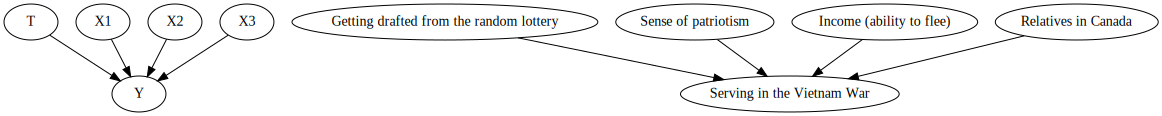

In [10]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("X1", "Y")
g.edge("X2", "Y")
g.edge("X3", "Y")

g.edge("Getting drafted from the random lottery", "Serving in the Vietnam War")
g.edge("Sense of patriotism", "Serving in the Vietnam War")
g.edge("Income (ability to flee)", "Serving in the Vietnam War")
g.edge("Relatives in Canada", "Serving in the Vietnam War")

g

<h4> Create a dataframe with the treatment (T), 3 covariates, and outcome variable. <h4>

In [11]:
df = pd.DataFrame({'T':T,'x1':x1,'x2':x2,'x3':x3, 'Y':Y})

In [12]:
results= smf.ols('Y~T+x1+x2+x3',data=df).fit()

<h3> Controling for all covariates that affect outcome <h3>

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.304e+30
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:11:32   Log-Likelihood:                 2993.8
No. Observations:                 100   AIC:                            -5978.
Df Residuals:                      95   BIC:                            -5965.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.954e-14   7.97e-15      2.452      0.0

<h3> Bias: 0 RMSE: 0 Treatment Effect: 0.5 <h3>

<h3> Now, not controlling for any covariates: <h3>

In [14]:
results_1= smf.ols('Y~T',data=df).fit()

In [15]:
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.08265
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.774
Time:                        13:11:39   Log-Likelihood:                -385.10
No. Observations:                 100   AIC:                             774.2
Df Residuals:                      98   BIC:                             779.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9537      1.565     19.783      0.0

In [17]:
MSE=np.square(np.subtract(0.5,0.6632)).mean()
RMSE=math.sqrt(MSE)

In [18]:
print("RMSE:\n")
print(RMSE)


RMSE:

0.1632


In [20]:
Bias = 0.6632-0.5
print("Bias (negatively) :\n ")
print(Bias)



Bias (negatively) :
 
0.1632


<h3> Then using sample size of 1000, same process as above <h3>


In [26]:
sample =1000
T_1=random.randint(2,size=(sample))
x_1=random.rand(sample)*100
x_2=random.rand(sample)*100
x_3=random.rand(sample)*100
Y_1=0.5*T_1+0.1*x_1+0.2*x_2+0.3*x_3
df_1 = pd.DataFrame({'T_1':T_1,'x_1':x_1,'x_2':x_2,'x_3':x_3, 'Y_1':Y_1})
results_3= smf.ols('Y_1~T_1+x_1+x_2+x_3',data=df_1).fit()
print(results_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    Y_1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.813e+31
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:12:57   Log-Likelihood:                 29656.
No. Observations:                1000   AIC:                        -5.930e+04
Df Residuals:                     995   BIC:                        -5.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.658e-14   3.38e-15    -13.769      0.0

<h4> No bias, RMSE=0, Treatment Effect = 0.5 when controlling for covariates <h4>
<h3> When not contorlling for covariates: <h3>

In [28]:
results_4= smf.ols('Y_1~T_1',data=df_1).fit()
print(results_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    Y_1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7961
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.372
Time:                        13:13:49   Log-Likelihood:                -3793.0
No. Observations:                1000   AIC:                             7590.
Df Residuals:                     998   BIC:                             7600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.8145      0.490     60.879      0.0

In [29]:
MSE=np.square(np.subtract(0.5,0.6071)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.6071-0.5
print("Bias:\n")
print(Bias)



RMSE:

0.10709999999999997
Bias:

0.10709999999999997


<h2> Bias is smaller with larger sample size

<h1> DGP 2: With confounder

<h4> Sample size of 1000, Treatment has a random component and depends on confounder (arbitrary coefficient of 0.2), outcome depends on both treatment and confounder (treatment effect of 0.5 and confounder coefficient of 0.3) <h4>

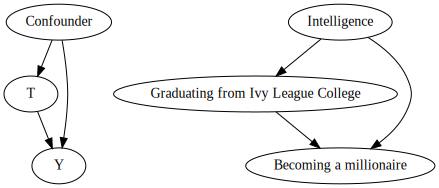

In [26]:
g2 = gr.Digraph()
g2.edge("T", "Y")
g2.edge("Confounder", "Y")
g2.edge("Confounder", "T")

g2.edge("Graduating from Ivy League College", "Becoming a millionaire")
g2.edge("Intelligence", "Becoming a millionaire")
g2.edge("Intelligence", "Graduating from Ivy League College")

g2

In [31]:
sample = 1000
Conf=random.rand(sample)*100
T2=0.2 * Conf +random.rand(sample)*100
Y2= 0.5 * T2 + 0.3 * Conf
#random.randint(2,size=(sample))

In [32]:
df_2 = pd.DataFrame({'T2':T2,'Conf':Conf,'Y2':Y2})

In [33]:
results_5= smf.ols('Y2~T2+Conf',data=df_2).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.155e+33
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:14:41   Log-Likelihood:                 30977.
No. Observations:                1000   AIC:                        -6.195e+04
Df Residuals:                     997   BIC:                        -6.193e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-14   7.43e-16    -22.407      0.0

<h3> Treatment effect correctly of 0.5, no bias, RMSE=0 when controlling for confounder

In [34]:
results_6= smf.ols('Y2~T2',data=df_2).fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     3260.
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          1.15e-316
Time:                        13:14:45   Log-Likelihood:                -3568.2
No. Observations:                1000   AIC:                             7140.
Df Residuals:                     998   BIC:                             7150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9210      0.626     20.640      0.0

In [35]:
MSE=np.square(np.subtract(0.5,0.5395)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.5395-0.5
print("Bias:\n")
print(Bias)



RMSE:

0.03949999999999998
Bias:

0.03949999999999998


<h4> There is bias when not controlling for confounder

<h3> Same procedure, with sample size of 100 <h3>

In [38]:
samples = 100

In [39]:
Confound=random.rand(samples)*100
T_2=0.2 * Confound + random.rand(samples)*100
Y_2= 0.5 * T_2 + 0.3 * Confound
df2 = pd.DataFrame({'T_2':T_2,'Confound':Confound,'Y_2':Y_2})
results_7= smf.ols('Y_2~T_2+Confound',data=df2).fit()
print(results_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y_2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.408e+31
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:15:28   Log-Likelihood:                 2984.2
No. Observations:                 100   AIC:                            -5962.
Df Residuals:                      97   BIC:                            -5955.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.81e-14   7.03e-15      2.576      0.0

<h4> When controlling for confounder, no bias, RMSE=0, treatment effect is correctly esitmated at 0.5

In [40]:
results_8= smf.ols('Y_2~T_2', data=df2).fit()
print(results_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y_2   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     480.7
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.43e-39
Time:                        13:15:36   Log-Likelihood:                -345.88
No. Observations:                 100   AIC:                             695.8
Df Residuals:                      98   BIC:                             701.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4473      1.730      6.038      0.0

In [55]:
MSE=np.square(np.subtract(0.5,0.5656)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.5656-0.5
print("Bias:\n")
print(Bias)



RMSE:

0.03290000000000004
Bias:

0.03290000000000004


<h3> When not controlling for confounder there is bias, but it is smaller with a larger sample size (though small difference)

<h1> DGP 3: Selection bias into treatment

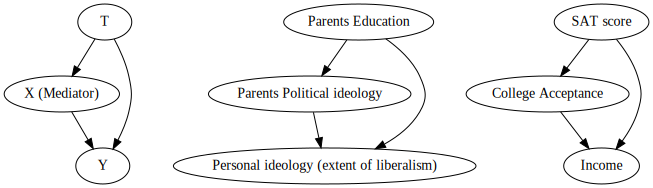

In [50]:
g3 = gr.Digraph()
g3.edge("T", "X (Mediator)")
g3.edge("T", "Y")
g3.edge("X (Mediator)", "Y")

g3.edge("Parents Education", "Parents Political ideology")
g3.edge("Parents Education", "Personal ideology (extent of liberalism)")
g3.edge("Parents Political ideology", "Personal ideology (extent of liberalism)")


g3.edge("SAT score", "College Acceptance")
g3.edge("SAT score", "Income")
g3.edge("College Acceptance", "Income")

g3

<h4> 2 examples: Parents education affects your personal ideology, which is mediated by your parents political ideology (affected by their education level). The other is that your SAT score affects your income level but through college acceptance.

<h4> First with 100 samples

In [42]:
sample_3 = 100
T3=random.rand(sample_3)*100
X3= 0.8*T3 + random.rand(sample_3)*100 
Y3= 0.6 * X3


df_3 = pd.DataFrame({'T3':T3,'X3':X3,'Y3':Y3})
results_9= smf.ols('Y3~T3+X3',data=df_3).fit()
print(results_9.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.707e+33
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:16:04   Log-Likelihood:                 3206.0
No. Observations:                 100   AIC:                            -6406.
Df Residuals:                      97   BIC:                            -6398.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.109e-15   8.14e-16      2.592      0.0

In [25]:
MSE=np.square(np.subtract(0.5,0)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.5-0
print("Bias (negatively):\n")
print(Bias)

print("Treatment Effect:\n ~0 (very small)")

RMSE:

0.5
Bias (negatively): 

0.5
Treatment Effect:
 ~0


<h3> Controlling for the mediator variable in between treatment and outcome, we see bias <h3>

In [43]:
results_11= smf.ols('Y3~T3',data=df_3).fit()
print(results_11.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     69.71
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           4.54e-13
Time:                        13:16:40   Log-Likelihood:                -422.14
No. Observations:                 100   AIC:                             848.3
Df Residuals:                      98   BIC:                             853.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8869      3.317      9.612      0.0

In [44]:
MSE=np.square(np.subtract(0.5,0.4768)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.5-0.4768
print("Bias (negatively): \n")
print(Bias)

print("Treatment Effect:\n 0.4768")

RMSE:

0.06190000000000001
Bias (negatively): 

0.06190000000000001
Treatment Effect:
 0.4381


<h3> Not controlling for the mediator, we see much less bias

<h3> Now with a sample size of 1000

In [45]:
sample_4 = 1000
T_3=random.rand(sample_4)*100
X_3= 0.8*T_3 + random.rand(sample_4)*100
Y_3= 0.6 * X_3

df3 = pd.DataFrame({'T_3':T_3,'X_3':X_3,'Y_3':Y_3})
results_10= smf.ols('Y_3~T_3 +X_3',data=df3).fit()
print(results_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y_3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.183e+32
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:17:27   Log-Likelihood:                 29616.
No. Observations:                1000   AIC:                        -5.923e+04
Df Residuals:                     997   BIC:                        -5.921e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.243e-14   2.85e-15     -4.364      0.0

In [46]:
MSE=np.square(np.subtract(0.5,0)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.5-0
print("Bias (negatively): \n")
print(Bias)


print("Treatment Effect:\n ~0 (very small)")

RMSE:

0.5
Bias (negatively): 

0.5
Treatment Effect:
 ~0


In [47]:
results_12= smf.ols('Y_3~T_3',data=df3).fit()
print(results_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y_3   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     615.8
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          2.92e-106
Time:                        13:17:58   Log-Likelihood:                -4269.9
No. Observations:                1000   AIC:                             8544.
Df Residuals:                     998   BIC:                             8554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9884      1.111     27.892      0.0

In [23]:
MSE=np.square(np.subtract(0.5,0.4689)).mean()
RMSE=math.sqrt(MSE)
print("RMSE:\n")
print(RMSE)

Bias = 0.5-0.4689
print("Bias (negatively): \n")
print(Bias)


print("Treatment Effect:\n 0.4689")

RMSE:

0.0015000000000000013
Bias (negatively): 

0.0015000000000000013
Treatment Effect:
 0.4985


<h3>Thus, we see that the bias is smaller with a larger sample size (though very comparable). More importantly, there is bias when we do control for the mediator variable in between the treatment and outcome.